In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [8]:
print("Pandas version:{}".format(pd.__version__))
print("Numpy version:{}".format(np.__version__))
print("Matplotlib version:{}".format(matplotlib.__version__))
print("Seaborn version:{}".format(sns.__version__))

Pandas version:0.23.0
Numpy version:1.14.3
Matplotlib version:2.2.2
Seaborn version:0.8.1


In [9]:
train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [10]:
train_original=train.copy()
test_original=test.copy()

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

In [18]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Taking a look into Target Variable

In [20]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
#To print the proportions we can set normalize to be True
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

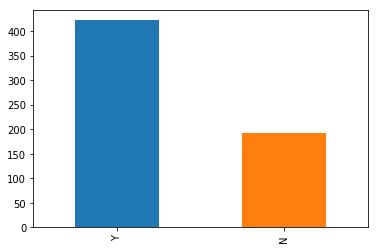

In [24]:
#Plotting the target variable
train['Loan_Status'].value_counts().plot.bar()

#### Visualizing each variable separately
**Categorical Variables:**   Gender, Married, Self employed, Loan_Status, CreditHistory<br>
**Ordinal Variables:**   Education, Dependents, Property Area<br>
**Numerical Features:**      AppicantIncome, CoapplicantIncome, LoanAmountTerm

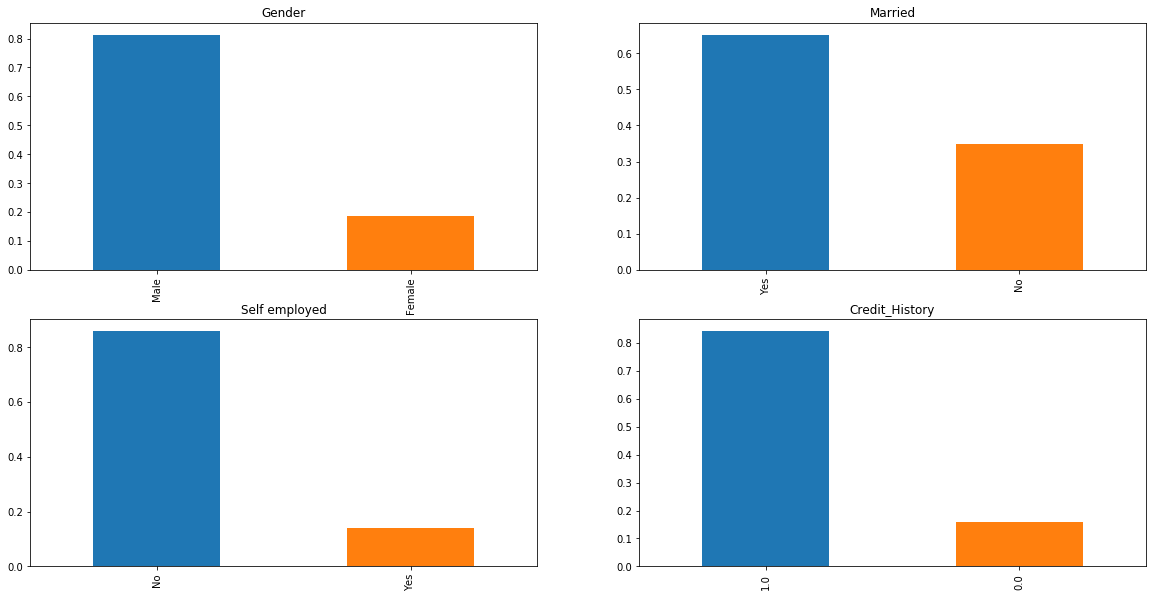

In [45]:
#Visualizing independent variable(Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

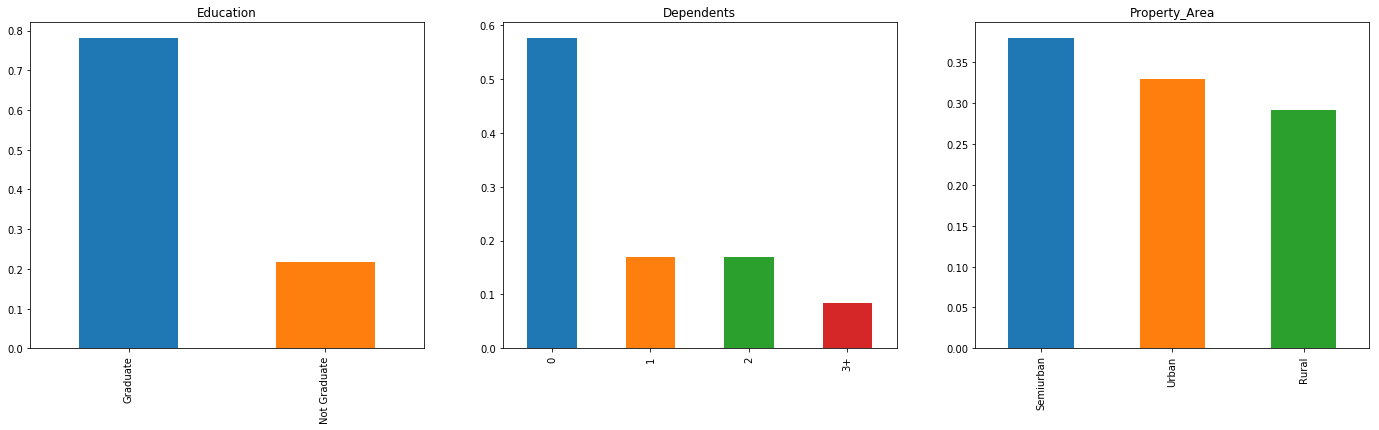

In [43]:
#Visualizing ordinal Variables
plt.figure(2)
plt.subplot(131)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(132)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

C:\Users\HP14A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


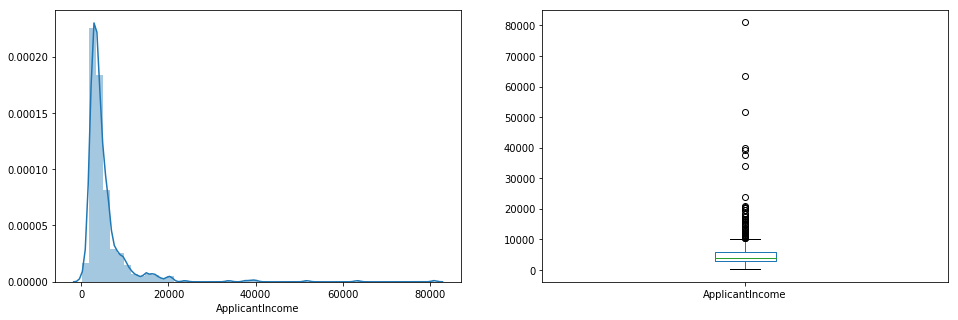

In [50]:
#Visualizing numerical variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

Text(0.5,0.98,'')

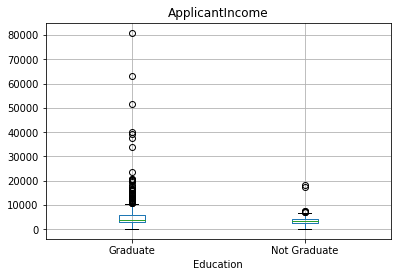

In [55]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

C:\Users\HP14A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


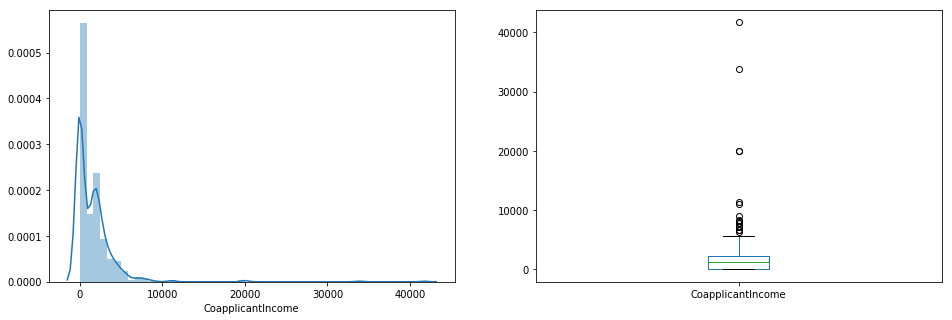

In [61]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))


C:\Users\HP14A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


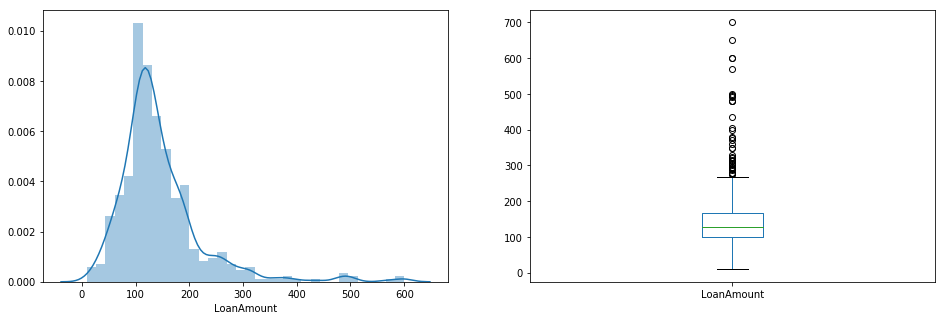

In [66]:
#Loan Amount
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

### Bivariate Analysis

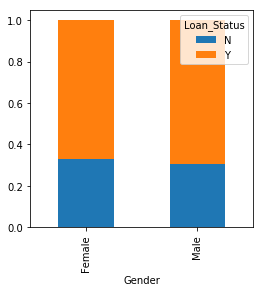

In [72]:
#Categorical Independent Variable vs Target Variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

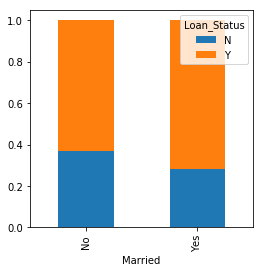

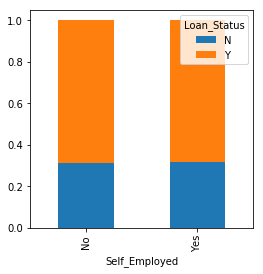

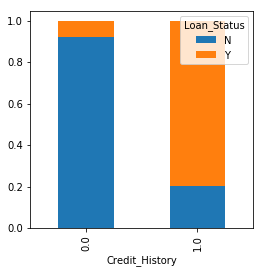

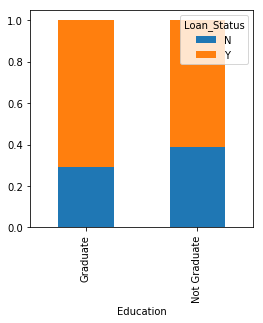

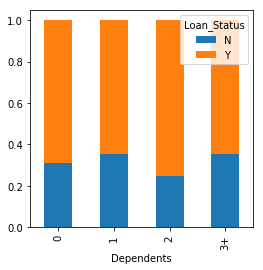

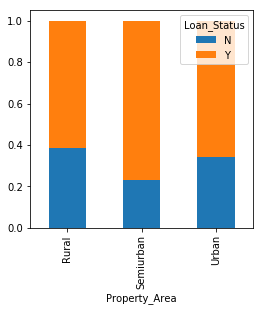

In [76]:
#Visualizing other categorical variables
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

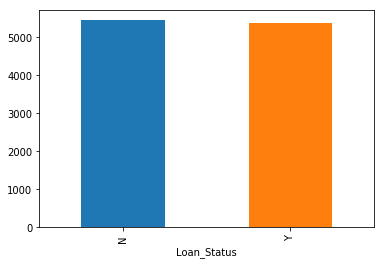

In [80]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0,0.5,'Percentage')

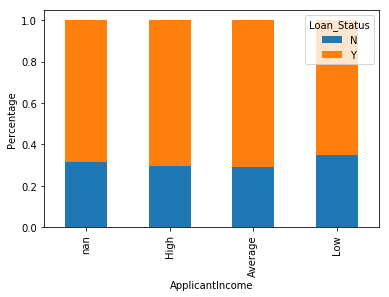

In [86]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

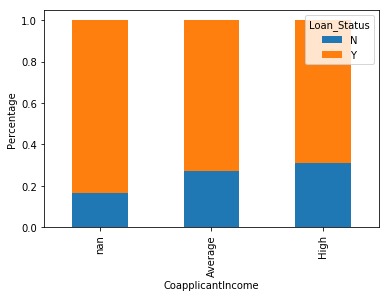

In [87]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
#This shows that if income of coapplicant is low then chances of loan approval is high. But Applicant might not have coapplicant so their coapplicant value becomes 0.
#This shows that loan approval is not dependent on it.

Text(0,0.5,'Percentage')

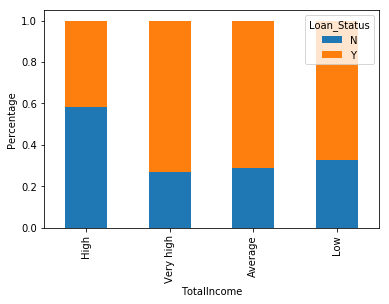

In [98]:
#Combining ApplicantIncome and CoapplicantIncome to see the totalIncome effect in LoanStatus
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['TotalIncome_bin']=pd.cut(train['TotalIncome'],bins,labels=group)
TotalIncome_bin=pd.crosstab(train['TotalIncome_bin'],train['Loan_Status']) 
TotalIncome_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('TotalIncome')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

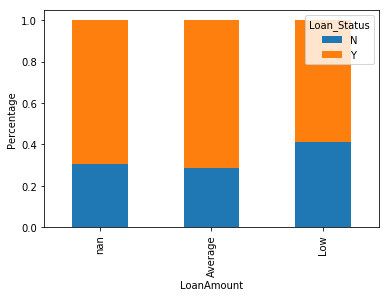

In [99]:
#Loan Amount Variable
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [100]:
#Dropping all the columns that we have created for exploration
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'TotalIncome_bin', 'TotalIncome'], axis=1)
#Replacing 3+ by  3 to make numerical variable
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
#Converting target variables categories to 0 and 1 to find co-relation among 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

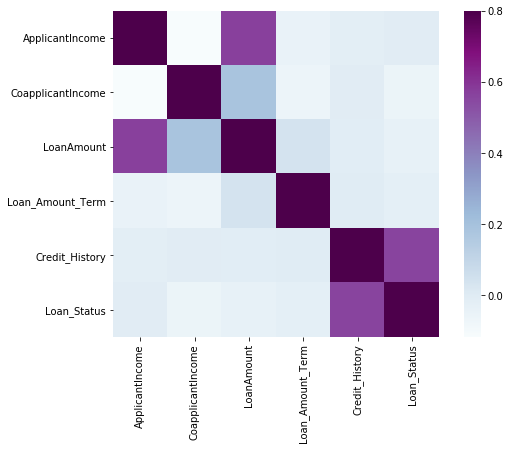

In [101]:
#Visulaizing correlation between all numerical variables
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

### Dealing with missing values and outliers

In [103]:
#Listing feature-wise count of missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### For missing values:<b>
    Categorical Variables: Impute using mode
    For numerical variables:Impute using mean or median

In [104]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [105]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [106]:
#Since Loan_Amount_Term 360 as more repeating value, so we will use mode to impute empty places
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [107]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [109]:
#Imputing test set
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [110]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### Treating outliers
Outliers often make a great impact on mean and standard deviation which affects the distribution. So, it is necessary to remove these outliers. As we have seen in LoanAmount plot, due to the presence of outliers, all the data points are on the left side of plot leaving a long tail on the right side. We call this as right-skewness.<br>
**One way to remove skewness is to use log transformation.**
Taking log transformation does not affect the smaller values but changes the larger values.<br>
So we will get distribution similar to normal distribution.

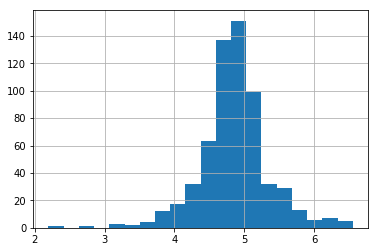

In [112]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

#### Building the model

In [113]:
#First we will drop the LoadId column as this column does not contribute to our model
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [129]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [131]:
#Separating features with target
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [132]:
#We need to make dummy variables for categorical variables
#It is because sklearn models only takes numerical values
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [133]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_v,y_train,y_v=train_test_split(X,y,test_size=0.3,random_state=42)

In [137]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
predict_v=reg.predict(x_v)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_v,predict_v)

0.7837837837837838